In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [3]:
# Build a function to import data

def import_csv(url):
  path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
  return pd.read_csv(path)

In [4]:
# Import csv files

orders_url = "https://drive.google.com/file/d/1fF3mnHUVPwA81qFXf9dtnIPeC_v7sHDC/view?usp=sharing"
orderlines_url = "https://drive.google.com/file/d/1z1ifRsB6X-VR_RldopmDCGAXvSSSaQeu/view?usp=sharing"
products_url = "https://drive.google.com/file/d/1Eo4wWvlaAfiN1wg0MkWbsMi-0ndKsCDs/view?usp=sharing"
brands_url = "https://drive.google.com/file/d/1kZYl6bKIqA3KKhGf26mg8NdST3tllAyc/view?usp=sharing"

orderlines = import_csv(orderlines_url)
orders = import_csv(orders_url)
products = import_csv(products_url)
brands = import_csv(brands_url)

# make a copy of each dataframe to keep the original data untouched and safe
orderlines_df = orderlines.copy()
orders_df = orders.copy()
products_df = products.copy()
brands_df = brands.copy()

---

## Exploring the Data

### 1. Explore orders dataframe

In [5]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [6]:
orders_df.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


In [7]:
# convert the datatype of 'created_date' into datetime
orders_df['created_date'] = pd.to_datetime(orders_df['created_date'])

# convert the datatype of 'order_id' into string
orders_df['order_id'] = orders_df['order_id'].astype(str)

In [8]:
# Drop the 5 Null-values of 'total_paid' column
orders_df = orders_df.dropna(subset=['total_paid'])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226904 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226904 non-null  object        
 1   created_date  226904 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226904 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 8.7+ MB


In [9]:
orders_df['state'].value_counts()

state
Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14374
Cancelled            7233
Name: count, dtype: int64

In [10]:
# keep just the Completed orders
orders_df = orders_df.loc[orders_df['state']=='Completed']

In [11]:
orders_df.shape

(46605, 4)

In [12]:
# check if there are duplicates
orders_df.drop_duplicates().shape

(46605, 4)

### 2. Explore orderlines dataframe

In [13]:
orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [14]:
orderlines_df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [15]:
# convert and correct the datatype of 'date' column into datetime
orderlines_df['date'] = pd.to_datetime(orderlines_df['date'])

# convert the datatype of 'id' and 'id_order' columns into srting
orderlines_df['id'] = orderlines_df['id'].astype(str)
orderlines_df['id_order'] = orderlines_df['id_order'].astype(str)


In [16]:
orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  object        
 1   id_order          293983 non-null  object        
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 15.7+ MB


In [17]:
orderlines_df.nunique()

id                  293983
id_order            204855
product_id               1
product_quantity        67
sku                   7951
unit_price           11329
date                251631
dtype: int64

In [18]:
orderlines_df.sample(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date
221867,1534053,480338,0,1,OTT0166,29.99,2018-01-02 21:52:01
217243,1524808,476176,0,1,APP2489,1.159.00,2017-12-29 12:52:25
79054,1272189,367645,0,1,XRI0008,148.75,2017-06-20 23:48:51
216846,1524045,475851,0,1,APP1135,48.45,2017-12-29 07:33:00
195535,1486643,458956,0,1,LGE0037,149.00,2017-12-10 13:49:48
81974,1277257,370122,0,1,OWC0218-2,98.99,2017-06-28 22:42:20
285506,1637630,522083,0,1,DLL0049,138.00,2018-03-06 10:24:27
216080,1522564,475150,0,1,QNA0220,563.99,2017-12-28 17:05:58
194973,1485931,458700,0,1,APP0662,144.00,2017-12-10 01:07:12
203548,1498680,463897,0,1,SPE0208,19.99,2017-12-15 16:42:54


In [19]:
# Drop and rename some columns
orderlines_df = orderlines_df.drop(['id','product_id'], axis=1)
orderlines_df = orderlines_df.rename(columns = {'product_quantity':'qty' , 'id_order':'order_id'})

In [20]:
# keep the rows in orderlines_df that exist in orders_df (completed orders)

orderlines_df = orderlines_df.loc[orderlines_df['order_id'].isin(orders_df['order_id'])].copy()

In [21]:
# handling with unit_price which contains numbrs like:1.137.99 
# check how many numbers like this there are:

orderlines_df.unit_price.str.contains(r"\d+\.\d+\.\d+").value_counts()


unit_price
False    58542
True      3561
Name: count, dtype: int64

In [22]:
# calculate the percentage of rows whit this problem

two_dot_percentage = ((orderlines_df.unit_price.str.contains(r"\d+\.\d+\.\d+").value_counts().iloc[1] / orderlines_df.shape[0])*100).round(2)

print(f"The 2 dot problem represents {two_dot_percentage}% of the rows in our DataFrame")


The 2 dot problem represents 5.73% of the rows in our DataFrame


In [23]:
# Get the list of 'order_id's that are affected with this issue
two_dot_order_ids_list = orderlines_df.loc[orderlines_df.unit_price.str.contains(r"\d+\.\d+\.\d+") , "order_id"].copy()

# keep only non-affected order_ids
orderlines_df = orderlines_df.loc[~orderlines_df.order_id.isin(two_dot_order_ids_list)].copy()


In [24]:
# convert the datatype of 'unit_price' into numeric
orderlines_df['unit_price'] = pd.to_numeric(orderlines_df['unit_price'])


In [25]:
orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56714 entries, 7 to 293661
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    56714 non-null  object        
 1   qty         56714 non-null  int64         
 2   sku         56714 non-null  object        
 3   unit_price  56714 non-null  float64       
 4   date        56714 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.6+ MB


In [26]:
orderlines_df.shape

(56714, 5)

In [27]:
# check if there are some duplicates
orderlines_df.drop_duplicates().shape

(56714, 5)

---

### 3. Explore brands dataframe

In [28]:
brands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [29]:
brands_df.sample(6)

,short,long
119,OWC,OWC
30,DOD,Dodocool
152,SSE,Sen.se
174,UAG,Urban Armor Gear
99,MUV,Muvit
35,ELE,Elevation Lab


### 4. Explore products dataframe

In [30]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [31]:
products_df.sample(6)

,sku,name,desc,price,promo_price,in_stock,type
4171,APP1389,"Apple iMac 27 ""Core i5 3.3GHz Retina 5K | 8GB ...",IMac desktop computer 27 inch 8GB RAM 512GB Re...,3169,30.175.839,0,"5,74E+15"
18909,APP2380,"Apple Macbook Pro 13 ""Core i5 2.3GHz | 8GB | 5...",New MacBook Pro 13-inch Core i7 23 GHz with 8G...,1999,18.990.043,0,"1,02E+12"
4511,PAC1035,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB |...",IMac desktop computer 27 inch 5K Retina 4GHz i...,3649,30.809.903,0,"5,74E+15"
12303,APP1604,Apple Watch Sport Gold 42mm Strap Royal Blue W...,Gold Apple Watch Sport Aluminum 42mm nylon str...,419,419,0,24895185
14860,BOS0051,IE SoundSport Bose Headphones Blue Neon IFM,In-Ear Headphones with earplugs sports parts f...,99,859.899,0,5384
10513,PAC1606,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB R...",IMac desktop computer 27 inch Retina 5K 4GHz C...,4849,35.129.906,0,"5,74E+15"


In [32]:
# handling with promo_price which contains numbrs like:1.137.99 
# check how many numbers like this there are:

products_df.promo_price.str.contains(r"\d+\.\d+\.\d+").value_counts()


promo_price
True     12902
False     6424
Name: count, dtype: int64

In [33]:
# calculate the percentage of rows whit this problem in products_df

two_dot_percentage = ((products_df.promo_price.str.contains(r"\d+\.\d+\.\d+").value_counts().iloc[1] / products_df.shape[0])*100).round(2)

print(f"The 2 dot problem represents {two_dot_percentage}% of the rows in products DataFrame")


The 2 dot problem represents 33.24% of the rows in products DataFrame


In [34]:
# Drop the promo_price column and 'desc' and 'in_stock' column as well

products_df = products_df.drop(['promo_price','in_stock'] , axis=1)

In [35]:
products_df.sample(4)

,sku,name,desc,price,type
3142,OTT0122,OtterBox Defender Case for iPhone 6 / 6S Plus ...,Funda iPhone 6 / 6S ultra resistant multilayer...,59.99,11865403
16198,PAC2085,"Apple iMac 27 ""Core i7 42GHz 5K Retina | 64GB ...",IMac desktop computer 27 inch Retina 5K RAM 64...,4525.59,"5,74E+15"
16400,APP2277,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,2359,"1,02E+12"
6241,PAC1066,"Apple iMac 27 ""Core i5 3.3GHz Retina 5K | 32GB...",IMac desktop computer 27 inch 5K Retina i5 3.3...,3889,"5,74E+15"


In [36]:
products_df.isna().sum()

sku       0
name      0
desc      7
price    46
type     50
dtype: int64

In [37]:
# Drop the Null_values in 'price' column 
products_df = products_df.dropna(subset=['price'])

In [38]:
products_df.isna().sum()

sku       0
name      0
desc      7
price     0
type     50
dtype: int64

In [39]:
# checking the 'price' column to see if it contains numbrs like:1.137.99 

products_df.price.str.contains(r"\d+\.\d+\.\d+").value_counts()


price
False    18849
True       431
Name: count, dtype: int64

In [40]:
# keep only rows that don't have this issue

products_df = products_df.loc[~products_df.price.str.contains(r"\d+\.\d+\.\d+")].copy()

In [41]:
products_df.shape

(18849, 5)

In [42]:
# convert the datatype of price column to numeric 

products_df['price'] = pd.to_numeric(products_df['price'])

In [43]:
# extract short name of brands from 'sku' column to join products_df and brands_df 
products_df['short'] = products_df.loc[:,'sku'].str[:3]

In [44]:
products_df.head(2)

,sku,name,desc,price,type,short
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,8696,RAI
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,13855401,APP


In [45]:
# merge the products_df and brands_df
products_brands_df = products_df.merge(brands_df , on='short')
products_brands_df.sample(3)

,sku,name,desc,price,type,short,long
12501,PAC1868,Synology DS416play | 16TB (4x4TB) WD Red,NAS with 16TB capacity (4x4TB) WD Red hard dri...,1110.99,12175397,PAC,Pack
14198,PAC1541,Crucial SSD expansion kit MX300 525GB + 16GB 1...,SSD upgrade kit 525GB + 8GB 1066MHz RAM for Ma...,466.63,1433,PAC,Pack
17998,BEL0346,Belkin DVI Video Adapter - VGA,Belkin adapter for monitors with DVI - VGA for...,7.99,12585395,BEL,Belkin


In [46]:
# Drop 'short' column and rename 'long' to 'brand'
products_brands_df = products_brands_df.rename(columns={'long':'brand'})

products_brands_df = products_brands_df.drop(columns='short')

In [47]:
products_brands_df.sample(3)

,sku,name,desc,price,type,brand
14906,STM0087-A,"Open - STM Dux iPad Case rigid Pro 97 ""Black",Resistant sheath with support for the new case...,69.95,1298,STM
16089,APP2324,"Apple MacBook Pro 15 ""Core i7 Touch Bar 31GHz ...",New MacBook Pro 15-inch Touch Bar to 31GHz Cor...,3279.00,"1,02E+12",Apple
6985,PAC1613,"Apple iMac 27 ""Core i7 Retina 5K 4Ghz | 8GB RA...",IMac desktop computer 27 inch Retina 5K 4GHz C...,3649.00,"5,74E+15",Pack


In [48]:
products_brands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18653 entries, 0 to 18652
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sku     18653 non-null  object 
 1   name    18653 non-null  object 
 2   desc    18647 non-null  object 
 3   price   18653 non-null  float64
 4   type    18607 non-null  object 
 5   brand   18653 non-null  object 
dtypes: float64(1), object(5)
memory usage: 874.5+ KB


In [49]:
products_brands_df['brand'].value_counts()

brand
Pack               7004
Apple              5138
OWC                 354
Belkin              222
Western Digital     213
                   ... 
Nimbus                1
Joby                  1
Mistify               1
SDesign               1
Qardio                1
Name: count, Length: 179, dtype: int64

---

###  Create an expanded dataframe

In [50]:
# Merge ordersline_df and products_brands_df 
orderlines_expanded = orderlines_df.merge(products_brands_df , on='sku')

In [51]:
orderlines_expanded.sample(2)

,order_id,qty,sku,unit_price,date,name,desc,price,type,brand
14159,363137,1,MAC0138,24.99,2017-06-07 13:04:59,Macally Case / Stand Shell iPad Pro 9.7 / Air ...,Support housing and polyurethane cases and cas...,29.95,12635403,Macally
38212,453387,1,QNA0216,479.99,2017-12-01 19:14:04,QNAP NAS server TS-453Bmini | 4GB RAM | 4-bay ...,NAS with HDMI 4K (3840x2160) output 4-core pro...,519.09,12175397,QNAP


In [52]:
# price : base price of the product
# unit_price :  price of each product at the moment of placing that order --> after discount

In [53]:
# Create a column for revenue

orderlines_expanded['revenue'] = (orderlines_expanded['unit_price'] * orderlines_expanded['qty'])

# Create a column for discount(percentage)

orderlines_expanded['percentage_discount'] = (
    100 * (orderlines_expanded['price'] - orderlines_expanded['unit_price'])/ orderlines_expanded['price']).round(0).astype(int)

In [54]:
orderlines_expanded.sample(4)

,order_id,qty,sku,unit_price,date,name,desc,price,type,brand,revenue,percentage_discount
26407,410885,1,SAT0033,29.74,2017-10-10 14:06:49,Support Satechi Slim MacBook or iMac Aluminum ...,Stand with aluminum finish and practical desig...,49.99,8696,Satechi,29.74,41
8970,327257,1,OWC0074,70.19,2017-02-21 17:55:14,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,8GB RAM Mac mini iMac MacBook and MacBook Pro ...,99.99,1364,OWC,70.19,30
45016,479665,1,CRU0051,121.90,2018-01-02 14:54:13,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,12215397,Crucial,121.90,23
17087,375715,1,PUR0144,9.99,2017-07-11 07:37:10,Pure UltraSlim Case 03 + Protector iPhone 6 / ...,03mm skinny sleeve with included screen protec...,9.95,11865403,Puro,9.99,0


In [55]:
(orderlines_expanded['percentage_discount']>=0).value_counts()

percentage_discount
True     55389
False      871
Name: count, dtype: int64

In [56]:
# create a function to categorize the price

def price_range(price):
    if price <= 50:
        return '0-50'
    elif price <= 100:
        return '50-100'
    elif price <= 200:
        return '100-200'
    elif price <= 400:
        return '200-400'
    elif price <= 600:
        return '400-600'
    elif price <= 800:
        return '600-800'
    elif price <= 1000:
        return '800-1000'
    elif price <= 1400:
        return '1000-1400'
    else:
        return '>1400'
        
# apply the function on the 'price' column
orderlines_expanded['price_range'] = orderlines_expanded['price'].apply(price_range)


In [57]:
# keep discounted orders, orders with percentage_discount > 0

orderlines_filtered = orderlines_expanded[orderlines_expanded['percentage_discount']>=0].copy()

In [58]:
orderlines_expanded.head(2)

,order_id,qty,sku,unit_price,date,name,desc,price,type,brand,revenue,percentage_discount,price_range
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,OWC,47.49,22,50-100
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,5720,iOttie,18.99,17,0-50


In [59]:
orderlines_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56260 entries, 0 to 56259
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             56260 non-null  object        
 1   qty                  56260 non-null  int64         
 2   sku                  56260 non-null  object        
 3   unit_price           56260 non-null  float64       
 4   date                 56260 non-null  datetime64[ns]
 5   name                 56260 non-null  object        
 6   desc                 56257 non-null  object        
 7   price                56260 non-null  float64       
 8   type                 56247 non-null  object        
 9   brand                56260 non-null  object        
 10  revenue              56260 non-null  float64       
 11  percentage_discount  56260 non-null  int32         
 12  price_range          56260 non-null  object        
dtypes: datetime64[ns](1), float64(3

---

## Answering business questions

### 1- What is the time period that the dataset covers?

In [60]:
days_covered = (orderlines_expanded['date'].max() - orderlines_expanded['date'].min()).days
print(f"The dataset covers {days_covered} days")

The dataset covers 437 days


### 2- What is the overall revenue for that time?

In [61]:
total_revenue = orderlines_filtered['revenue'].sum()
print(f"Total Revenue in this period of time is {total_revenue:.2f} €")

Total Revenue in this period of time is 8083372.23 €


### 3- Are there seasonal patterns in the evolution of sales?

In [62]:
# determine the quarter of each date
orderlines_filtered = orderlines_filtered.copy()
orderlines_filtered['quarter'] = orderlines_filtered['date'].dt.quarter
# create the year column
orderlines_filtered['year'] = orderlines_filtered['date'].dt.year

In [63]:
orderlines_filtered.sample(3)

,order_id,qty,sku,unit_price,date,name,desc,price,type,brand,revenue,percentage_discount,price_range,quarter,year
37862,451841,1,NTE0026,39.99,2017-11-29 14:28:47,NewerTech Voyager S3 Dock HDD USB3.0 / Sata,Dock disc 25 inches and 35 inches with USB3.0 ...,60.99,12995397,NewerTech,39.99,34,50-100,4,2017
46668,487160,1,BEL0374,61.99,2018-01-09 23:30:39,Belkin Base Qi Wireless charging up Boost iPho...,Base induction charging with Qi technology for...,64.99,5399,Belkin,61.99,5,50-100,1,2018
44074,477058,1,BEL0307,29.99,2017-12-30 01:48:45,Belkin Base Qi Wireless charging up Boost iPho...,Base induction charging with Qi technology for...,34.99,13615399,Belkin,29.99,14,0-50,4,2017


In [64]:
# calculate the sale in each quarter
quarterly_sales = orderlines_filtered.groupby(['year', 'quarter'])['qty'].sum().unstack()
quarterly_sales

quarter,1,2,3,4
year,,,,
2017,10200.0,6999.0,10815.0,21194.0
2018,13193.0,NaN,NaN,NaN


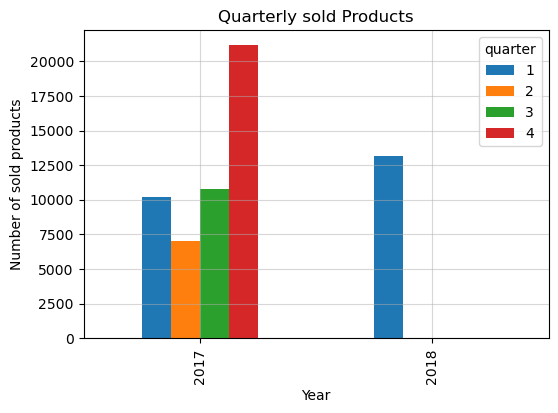

In [65]:
quarterly_sales.plot(kind='bar', figsize=(6,4), title='Quarterly sold Products')
plt.ylabel('Number of sold products')
plt.xlabel('Year')
plt.grid(True, alpha=0.5);

### 4. What is the distribution of product prices?

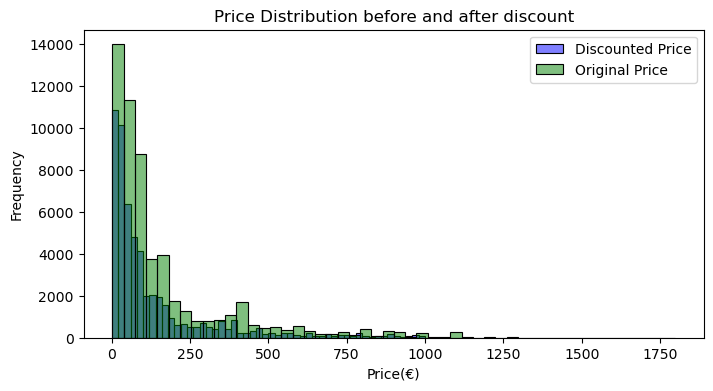

In [66]:
# Distribution of price, before discount (price) and after discount (unit_price)

plt.figure(figsize=(8,4) , dpi=100)
sns.histplot(orderlines_filtered['unit_price'], bins=50, color='blue', label='Discounted Price', alpha=0.5)
sns.histplot(orderlines_filtered['price'], bins=50, color='green', label='Original Price', alpha=0.5)
plt.title('Price Distribution before and after discount')
plt.ylabel('Frequency')
plt.xlabel('Price(€)')
plt.legend()
plt.show()

### 5. How many products are being discounted?

In [67]:
(orderlines_filtered['percentage_discount']>0).value_counts()

percentage_discount
True     51891
False     3498
Name: count, dtype: int64

In [68]:
num_discounted_products = (orderlines_filtered['percentage_discount']>0).value_counts().iloc[1]
percentage_discounted_products = 100 * (orderlines_filtered['percentage_discount']>0).value_counts().iloc[1] \
                                /orderlines_filtered.shape[0]
print(f"{num_discounted_products} products were discounted, which makes {percentage_discounted_products:.2f}% of all products")

3498 products were discounted, which makes 6.32% of all products


### 6. How do seasonality and special dates (Christmas, Black Friday) affect sales?

In [69]:
# create a column for month
orderlines_filtered.loc[:,'month'] = orderlines_filtered['date'].dt.month

# resample data by month-end ('ME') to count total orders per month
monthly_sales = orderlines_filtered.resample("ME", on="date")['order_id'].count()

# format the date index for better readability 
monthly_sales.index = monthly_sales.index.strftime('%b %Y')

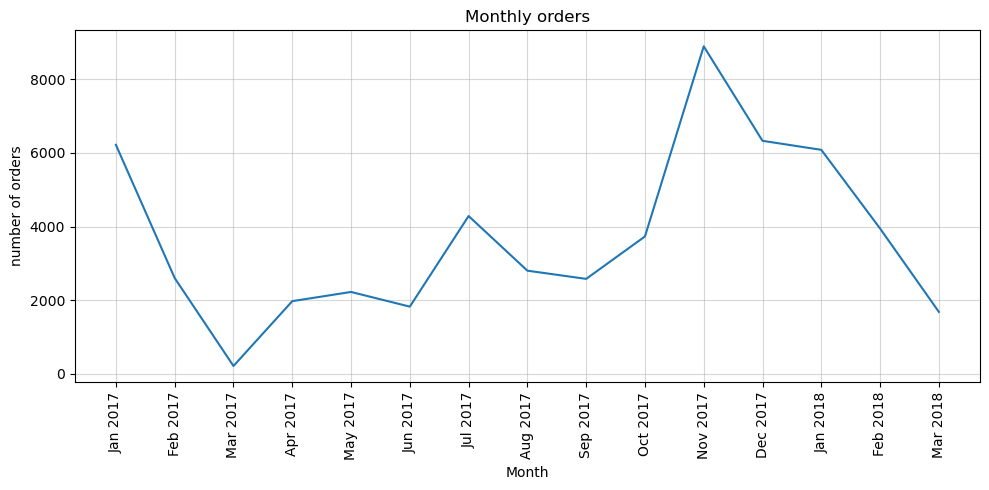

In [70]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index , monthly_sales.values)
plt.ylabel('number of orders')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.title('Monthly orders')
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

---

### 7. Is there any correlation between revenue and discount?

In [71]:
# Resample monthly and calculate:

monthly_aggs = orderlines_filtered.resample('ME', on='date').agg({
                                    'percentage_discount': 'mean',
                                    'revenue': 'sum',
                                    'order_id': pd.Series.nunique                 # To get the number of unique orders per day
                                    }).rename(columns={'order_id': 'orders_count'})

monthly_aggs

,percentage_discount,revenue,orders_count
date,,,
2017-01-31,26.312540,596536.81,4710
2017-02-28,21.128077,319579.19,2011
2017-03-31,21.094787,23068.86,160
2017-04-30,19.731880,245445.46,1488
2017-05-31,17.257310,334395.20,1689
2017-06-30,19.012610,279129.33,1383
2017-07-31,26.039197,602272.06,3143
2017-08-31,21.813281,384035.11,2148
2017-09-30,21.010085,408276.77,1932


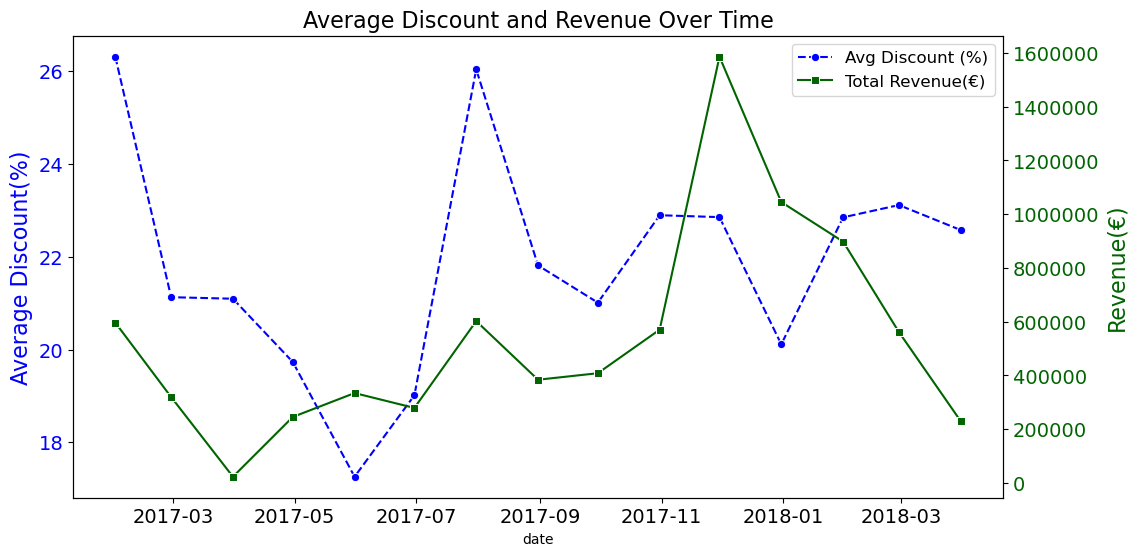

In [72]:
# 'Average Discount and Revenue Over Time'

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first line (average percentage discount)
sns.lineplot(data=monthly_aggs,
            x=monthly_aggs.index,
            y='percentage_discount',
            ax=ax1,
            color='blue',
            label='Avg Discount (%)',
            marker='o',
            linestyle='--')

# Set label for the first line
ax1.set_ylabel('Average Discount(%)', color='blue' , fontsize=16)

# Create second y-axis
ax2 = ax1.twinx()

# Plot the second line (total number of orders)
sns.lineplot(data=monthly_aggs,
            x=monthly_aggs.index,
            y='revenue',
            ax=ax2,
            color='darkgreen',
            label='Total Revenue(€)',
            marker='s')                      
                                            
# Set label for the second line
ax2.set_ylabel('Revenue(€)', color='darkgreen' , fontsize=16)

# Titles and formatting
ax1.set_title('Average Discount and Revenue Over Time', fontsize=16)
ax1.tick_params(axis='y', labelcolor='blue' , labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelcolor='darkgreen', labelsize=14)

# Get legend from both axes to place clean legend in a suitable location
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
# Combine both legends 
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', fontsize=12)
ax2.legend_.remove()    

# To display the full numbers on y axis not in scientific format
ax2.ticklabel_format(style='plain', axis='y')  

plt.show()

---

### 8. Which brands generate the highest revenue? Top brands?

In [73]:
# create a column for percentage_revenue
orderlines_filtered = orderlines_filtered.copy()
orderlines_filtered['percentage_revenue'] = 100 * orderlines_filtered['revenue'] / (orderlines_filtered['revenue'].sum())

In [74]:
orderlines_filtered.head(2)

,order_id,qty,sku,unit_price,date,name,desc,price,type,brand,revenue,percentage_discount,price_range,quarter,year,month,percentage_revenue
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,OWC,47.49,22,50-100,1,2017,1,0.000588
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,5720,iOttie,18.99,17,0-50,1,2017,1,0.000235


In [75]:
orderlines_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55389 entries, 0 to 56259
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             55389 non-null  object        
 1   qty                  55389 non-null  int64         
 2   sku                  55389 non-null  object        
 3   unit_price           55389 non-null  float64       
 4   date                 55389 non-null  datetime64[ns]
 5   name                 55389 non-null  object        
 6   desc                 55386 non-null  object        
 7   price                55389 non-null  float64       
 8   type                 55380 non-null  object        
 9   brand                55389 non-null  object        
 10  revenue              55389 non-null  float64       
 11  percentage_discount  55389 non-null  int32         
 12  price_range          55389 non-null  object        
 13  quarter              55389 non-null 

In [76]:
brands_performance = orderlines_filtered.groupby('brand').agg({'percentage_revenue':'sum'
                                                               ,'percentage_discount':'mean'})
Top_10_brands = brands_performance.nlargest(10, columns='percentage_revenue')
Top_10_brands

,percentage_revenue,percentage_discount
brand,,
Apple,32.475910,17.178230
Pack,7.558773,26.584780
OWC,5.803310,22.732732
LaCie,5.247761,13.224737
Western Digital,4.676125,18.556034
LG,4.007031,10.757184
Crucial,3.561542,16.409917
Wacom,3.484546,20.790072
Dell,3.254224,18.361345


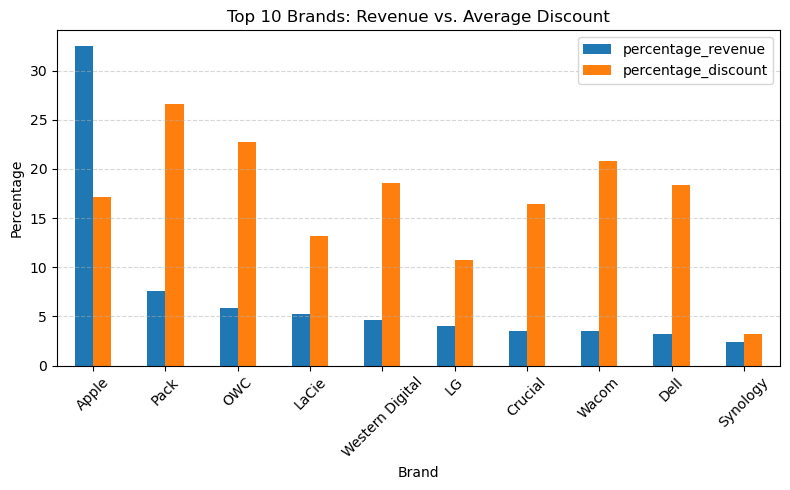

In [77]:
Top_10_brands.plot(kind='bar', figsize=(8,5))
plt.title('Top 10 Brands: Revenue vs. Average Discount')
plt.ylabel('Percentage')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

---

### 9. Did higher discounts lead to an increase in the number of orders?

In [78]:
orderlines_filtered.head(2)

,order_id,qty,sku,unit_price,date,name,desc,price,type,brand,revenue,percentage_discount,price_range,quarter,year,month,percentage_revenue
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,OWC,47.49,22,50-100,1,2017,1,0.000588
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,5720,iOttie,18.99,17,0-50,1,2017,1,0.000235


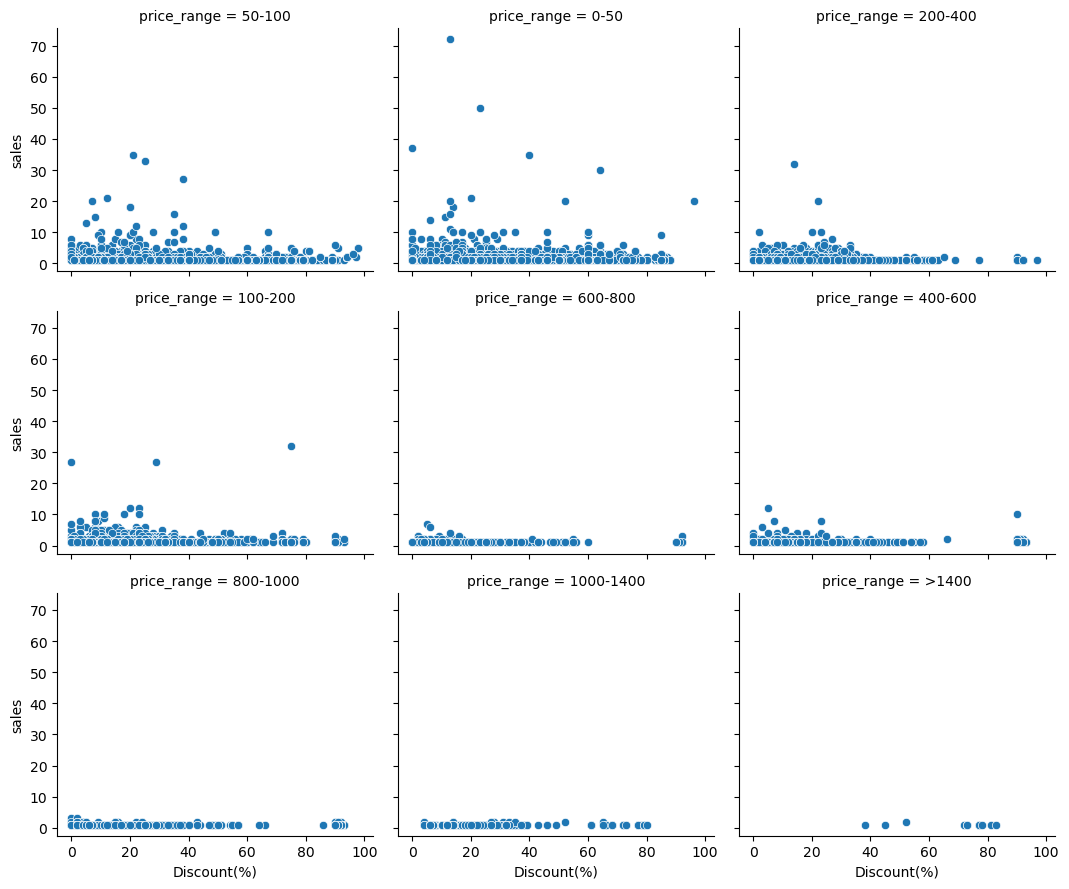

In [79]:
g = sns.relplot(data= orderlines_filtered , kind='scatter', 
                y='qty' , x='percentage_discount', 
                col='price_range', 
                col_wrap=3,
                height=3,
                aspect=1.2)

g.set_axis_labels("Discount(%)", "sales")
g.set_titles(size=10)

plt.show()

In [80]:
# Look at orders up to 50€ to see if there is a correlation between sale and discount
orders_0_50= orderlines_filtered[orderlines_filtered['price_range']=='0-50']

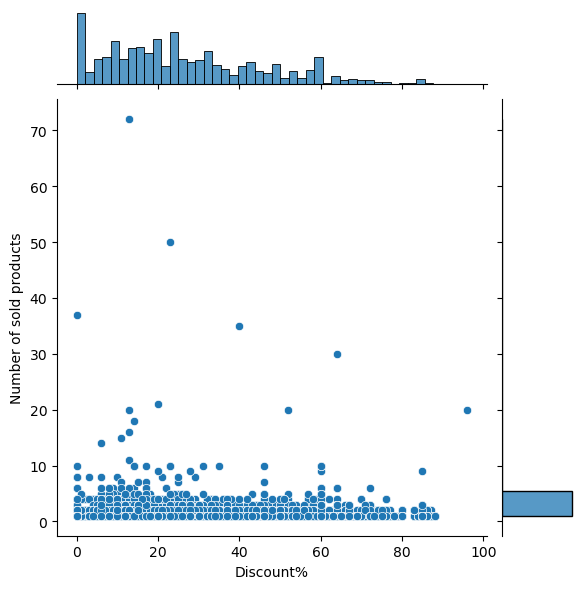

In [81]:
sns.jointplot(data= orders_0_50, 
              kind='scatter', 
              y='qty', x='percentage_discount')
#plt.title('Relationship of sale and discount in 0-50€ products')
plt.xlabel('Discount%')
plt.ylabel('Number of sold products')
plt.show()

In [82]:
# Look at orders 50-100€ to see if there is a correlation between sale and discount
orders_50_100 = orderlines_filtered[orderlines_filtered['price_range']=='50-100']

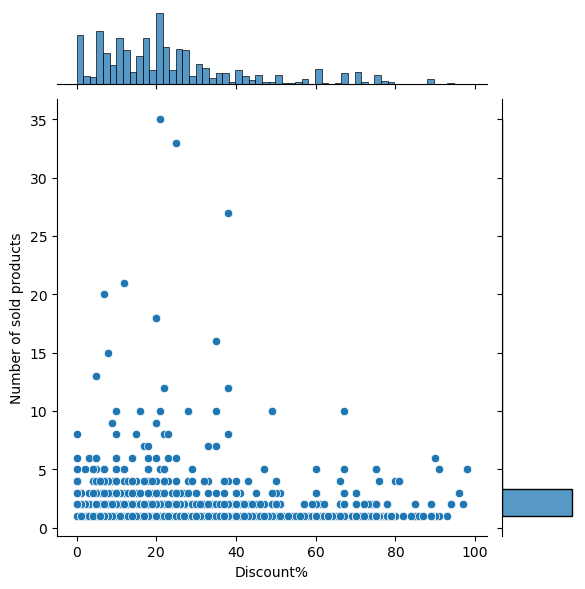

In [83]:
sns.jointplot(data= orders_50_100, 
              kind='scatter', 
              y='qty', x='percentage_discount')
#plt.title('Relationship of sale and discount in 0-50€ products')
plt.xlabel('Discount%')
plt.ylabel('Number of sold products')
plt.show()

---

### Categorize the Products
#### 10. How should products be classified into different categories to simplify reports and analysis?

In [84]:
orderlines_filtered['category']=''

In [86]:
orderlines_filtered.sample(2)

,order_id,qty,sku,unit_price,date,name,desc,price,type,brand,revenue,percentage_discount,price_range,quarter,year,month,percentage_revenue,category
10494,348290,1,SAN0099,29.99,2017-04-21 12:01:11,SanDisk Connect Wireless Flash Drive 64GB Wire...,Wireless 64GB storage for iPhone / iPad / Mac.,49.99,42945397,SanDisk,29.99,40,0-50,2,2017,4,0.000371,
14426,365218,1,SAT0029,42.99,2017-06-13 13:02:24,Satechi USB Hub-C to USB / Micro SD / SD / USB...,Hub with two USB 3.0 ports and SD Micro SD USB...,54.99,12585395,Satechi,42.99,22,50-100,2,2017,6,0.000532,


In [89]:
import re

storage_regex = re.compile(r"(OWC|LaCie|ThunderBay|My Book Pro|Mercury Elite Pro|qnap|nas|ssd|synology|sata|hard drive|flash drive|pendrive|hard disk|storage|memory)", flags=re.IGNORECASE)
laptop_regex = re.compile(r"apple macbook", flags=re.IGNORECASE)
smartphone_regex = re.compile(r"apple iphone.*?\d+gb", flags=re.IGNORECASE)
audio_regex = re.compile(r"(subwoofer|sub|headphones|airpod|headset)", flags=re.IGNORECASE)
tablet_regex = re.compile(r"(apple ipad|tablet)", flags=re.IGNORECASE)
desktop_regex = re.compile(r"apple (imac|mac mini|mac pro)", flags=re.IGNORECASE)
monitor_regex = re.compile(r"monitor", flags=re.IGNORECASE)
peripherals_regex = re.compile(r"(keyboard|mouse|speaker|pointer|presenter)", flags=re.IGNORECASE)
power_connectivity_regex = re.compile(r"(cable|connector|lightning to usb|wall socket|power strip|adapter)", flags=re.IGNORECASE)
case_regex = re.compile(r"(case|funda|housing|casing|folder|protective|cover)", flags=re.IGNORECASE)
battery_regex = re.compile(r"battery", flags=re.IGNORECASE)
charger_regex = re.compile(r"charger", flags=re.IGNORECASE)
smartwatch_regex = re.compile(r"(apple watch|smartwatch|smart watch)", flags=re.IGNORECASE)
server_regex = re.compile(r"(nas|server|raid|synology)", flags=re.IGNORECASE)
camera_regex = re.compile(r"camera", flags=re.IGNORECASE)
ram_regex = re.compile(r"(ddr4|dimm|ram)", flags=re.IGNORECASE)
repair_regex = re.compile(r"repair", flags=re.IGNORECASE)


def category_label(row):
    text = (str(row['name']) + " " + str(row['desc'])).lower()             # search in both columns, name and description

    if re.search(repair_regex, text):
        return 'Repair Service'
    if re.search(smartphone_regex, text):
        return 'Smartphone'
    if re.search(tablet_regex, text):
        return 'Tablet'
    if re.search(smartwatch_regex, text):
        return 'Smartwatch'
    if re.search(laptop_regex, text):
        return 'Laptop'
    if re.search(desktop_regex, text):
        return 'Desktop'
    if re.search(camera_regex, text):
        return 'Camera'
    if re.search(audio_regex, text):
        return 'Audio'
    if re.search(monitor_regex, text):
        return 'Monitor'
    if re.search(ram_regex, text):
        return 'Ram'
    if re.search(storage_regex, text):
        return 'Storage'
    if re.search(server_regex, text):
        return 'Server'
    if re.search(charger_regex, text):
        return 'Charger'
    if re.search(battery_regex, text):
        return 'Battery'
    if re.search(power_connectivity_regex, text):
        return 'Power/Connectivity'
    if re.search(case_regex, text):
        return 'Case'
    if re.search(peripherals_regex, text):
        return 'Peripherals'
    else:
        return 'Other'


# Apply the function on the dataframe
orderlines_filtered["category"] = orderlines_filtered.apply(category_label, axis=1)


In [90]:
orderlines_filtered["category"].value_counts()

category
Storage               12561
Other                  8088
Case                   6526
Power/Connectivity     4988
Ram                    4313
Smartwatch             2754
Battery                2526
Tablet                 2457
Audio                  2432
Peripherals            2252
Smartphone             2194
Monitor                1802
Charger                 891
Laptop                  552
Camera                  404
Repair Service          380
Desktop                 206
Server                   63
Name: count, dtype: int64

In [92]:
# Revenue- vs Discountpercentage in each Category
category_performance = orderlines_filtered.groupby('category').agg({'percentage_revenue':'sum'
                                                               ,'percentage_discount':'mean'})


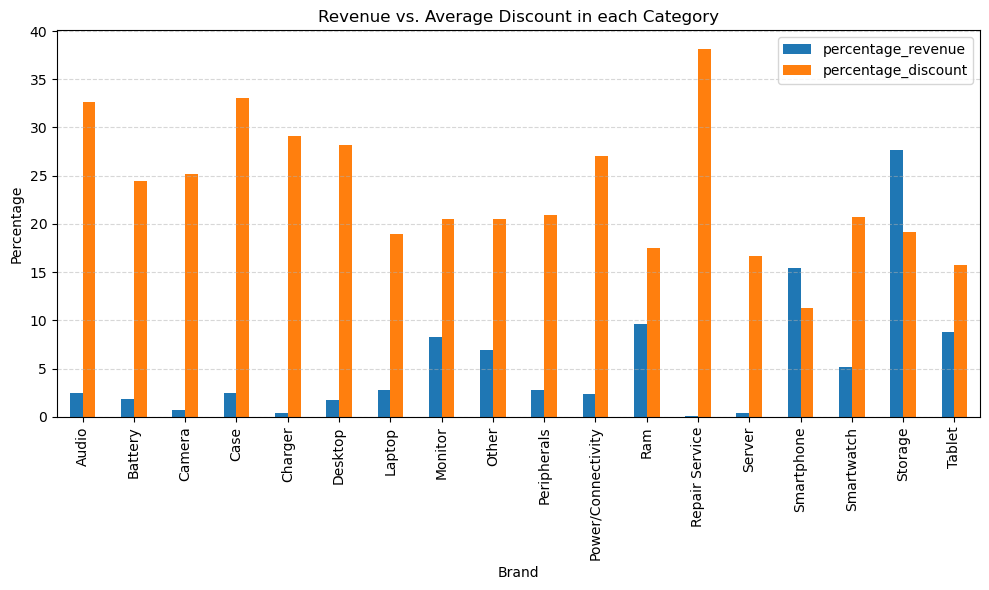

In [104]:
category_performance.plot(kind='bar', figsize=(10,6))
plt.title('Revenue vs. Average Discount in each Category')
plt.ylabel('Percentage')
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

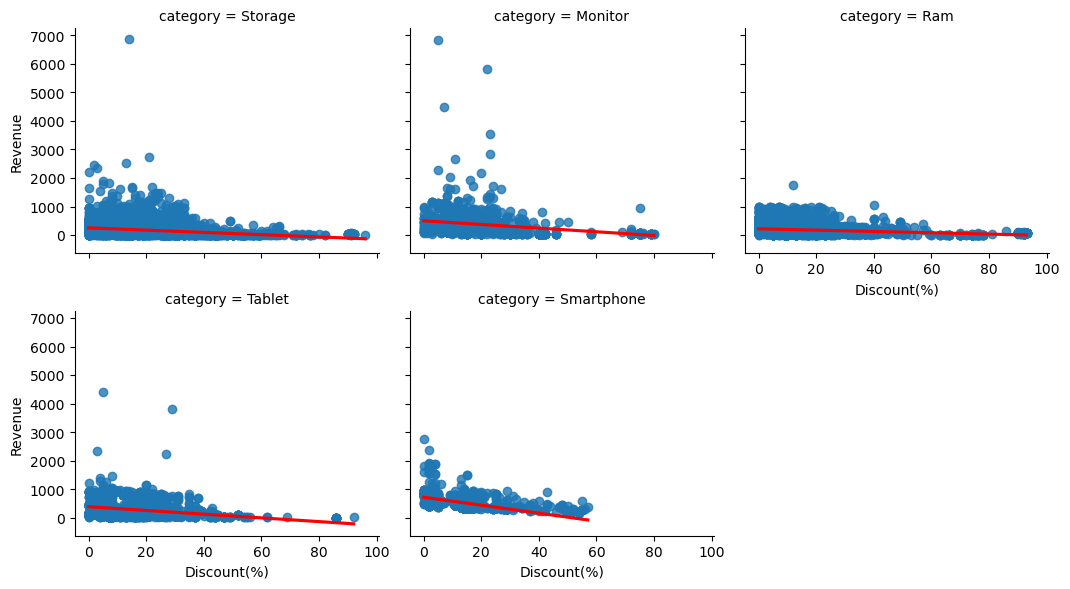

In [114]:
# Correlation between revenue and discount in each category

# Top 5 revenue-drivers categories
Top_5_category = category_performance.nlargest(5, columns='percentage_revenue').index

# Filter the dataframe to have the data for top 5
orderlines_Top_5_category = orderlines_filtered[orderlines_filtered['category'].isin(Top_5_category)]

# Scatterplot for each top-5-category
g = sns.lmplot(data= orderlines_Top_5_category,
                y='revenue' , x='percentage_discount', 
                col='category',
                col_wrap = 3,
                height=3,
                aspect=1.2,
                line_kws={'color': 'red'})

g.set_axis_labels("Discount(%)", "Revenue")
g.set_titles(size=10)

plt.show()


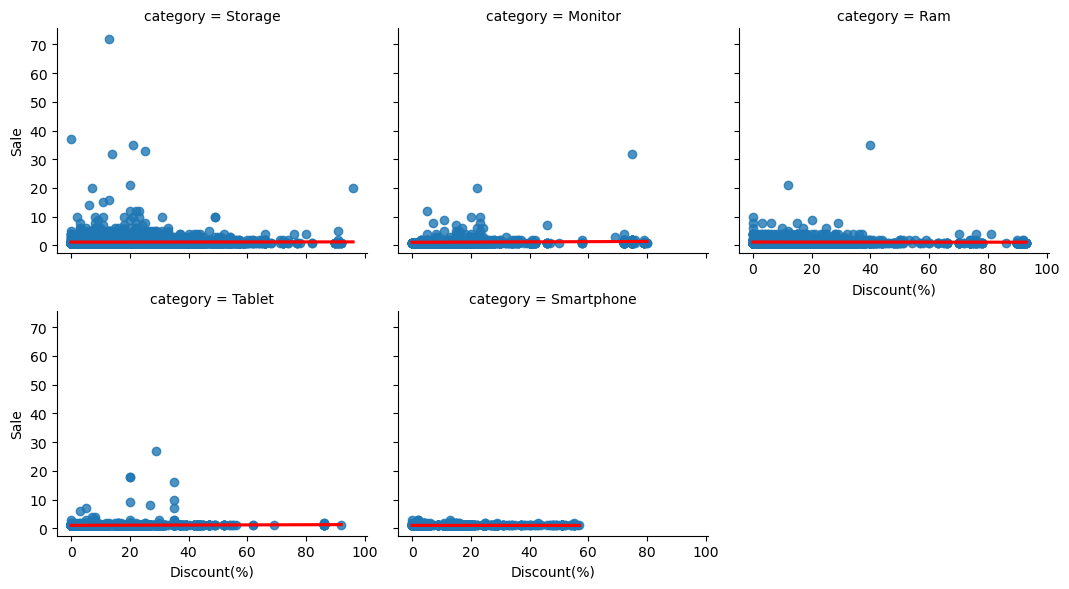

In [115]:
# Correlation between sale and discount in each category

orderlines_filtered[orderlines_filtered['category'].isin(Top_5_category)]

# Scatterplot for each top-5-category
g = sns.lmplot(data= orderlines_Top_5_category,
                y='qty' , x='percentage_discount', 
                col='category',
                col_wrap = 3,
                height=3,
                aspect=1.2,
                line_kws={'color': 'red'})

g.set_axis_labels("Discount(%)", "Sale")
g.set_titles(size=10)

plt.show()